In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('traffic_accidents_denver.csv')

SOURCE: https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-traffic-accidents
Period 1/1/2013 - 9/1/2020

In [5]:
data.head(1)

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,HARMFUL_EVENT_SEQ_1,HARMFUL_EVENT_SEQ_2,HARMFUL_EVENT_SEQ_3,ROAD_LOCATION,ROAD_DESCRIPTION,ROAD_CONTOUR,ROAD_CONDITION,LIGHT_CONDITION,TU1_VEHICLE_TYPE,TU1_TRAVEL_DIRECTION,TU1_VEHICLE_MOVEMENT,TU1_DRIVER_ACTION,TU1_DRIVER_HUMANCONTRIBFACTOR,TU1_PEDESTRIAN_ACTION,TU2_VEHICLE_TYPE,TU2_TRAVEL_DIRECTION,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2
0,1,20193963.0,2019396354010,5401,0,TRAF - ACCIDENT - HIT & RUN,2019-01-02 20:50:00,NaN,2019-01-02 21:01:00,W COLFAX AVE / N FEDERAL BLVD,3133517.0,1694947.0,-105.02522,39.740476,1.0,121.0,West Colfax,0.0,0.0,SIDE TO SIDE SAME DIRECTION WITH MV IN TRANSPORT,,SIDE TO SIDE SAME DIRECTION WITH MV IN TRANSPORT,ON ROADWAY,AT INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,WEST,OTHER,CARELESS DRIVING,,,PASSENGER CAR/VAN,WEST,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,


In [561]:
#data['TU1_DRIVER_HUMANCONTRIBFACTOR'].value_counts()

In [680]:
data.shape

(181837, 45)

In [1093]:
data['TU1_DRIVER_ACTION'].value_counts()

CARELESS DRIVING                      44378
FOLLOWED TOO CLOSELY                  33088
FAILED TO YIELD ROW                   21694
OTHER                                 17340
                                      17000
LANE VIOLATION                        16058
FAILED TO STOP AT SIGNAL               7709
IMPROPER BACKING                       6839
EXCEED SAFE/POSTED SPEED               3988
IMPROPER TURN                          3020
RECKLESS DRIVING                       2913
DISREGARD STOP SIGN                    2414
TURNED FROM WRONG LANE OR POSITION     2203
OTHER IMPROPER TURNS                    906
IMPROPER PASSING ON LEFT                621
IMPROPER PASSING ON RIGHT               460
DISREGARDED OTHER DEVICE                418
UNDER INVESTIGATION                     325
IMPEDED TRAFFIC                         291
SIGNALING VIOLATION                     168
NO ACTION                                 4
Name: TU1_DRIVER_ACTION, dtype: int64

In [1094]:
data['ROAD_DESCRIPTION'].value_counts()

NON INTERSECTION           73122
AT INTERSECTION            55885
INTERSECTION RELATED       16395
PARKING LOT                13116
HIGHWAY INTERCHANGE         9530
                            5524
DRIVEWAY ACCESS RELATED     5225
ALLEY RELATED               2147
ROUNDABOUT                   568
UNDER INVESTIGATION          325
Name: ROAD_DESCRIPTION, dtype: int64

In [682]:
data['SERIOUSLY_INJURED'].max()

7.0

In [551]:
#data['ROAD_CONDITION'].value_counts()

In [552]:
#data['LIGHT_CONDITION'].value_counts()

In [1151]:
df = data

In [1152]:
df['HUMAN_FACTOR'] = (np.select([\
                                 df['TU1_DRIVER_HUMANCONTRIBFACTOR'] == 'DISTRACTED-OTHER', \
                                 df['TU1_DRIVER_HUMANCONTRIBFACTOR'] == 'DISTRACTED CELLPHONE', \
                                 df['TU1_DRIVER_HUMANCONTRIBFACTOR'] == 'DISTRACTED PASSENGER', \
                                 df['TU1_DRIVER_HUMANCONTRIBFACTOR'] == 'DISTRACTED RADIO',\
                                 df['TU1_DRIVER_HUMANCONTRIBFACTOR'] == 'NO APPARENT',\
                                ],\
                                 ['DISTRACTED', 'DISTRACTED', 'DISTRACTED', 'DISTRACTED', 'OTHER'],\
                                 default=df['TU1_DRIVER_HUMANCONTRIBFACTOR']))

In [1153]:
#change blanks to 'OTHER'
df['HUMAN_FACTOR'] = df['HUMAN_FACTOR'].replace(r'^\s*$', 'OTHER', regex=True)
df['HUMAN_FACTOR'].value_counts()

OTHER                              113846
DISTRACTED                          19067
AGGRESSIVE DRIVING                  16165
DRIVER INEXPERIENCE                 12147
DUI/DWAI/DUID                        9314
DRIVER UNFAMILIAR WITH AREA          6500
DRIVER FATIGUE                       1195
ILLNESS/MEDICAL                      1030
ASLEEP AT THE WHEEL                   925
EVADING LAW ENFORCEMENT OFFICER       520
DRIVER EMOTIONALLY UPSET              455
PHYSICAL DISABILITY                   348
UNDER INVESTIGATION                   325
Name: HUMAN_FACTOR, dtype: int64

In [1154]:
#create dd/mm/yy in new DATE column
df['DATE'] = df['FIRST_OCCURRENCE_DATE'].str.extract(r'([0-9]{4}-[0-9]{1,2}-[0-9]{1,2})', expand=False)
df.head()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,HARMFUL_EVENT_SEQ_1,HARMFUL_EVENT_SEQ_2,HARMFUL_EVENT_SEQ_3,ROAD_LOCATION,ROAD_DESCRIPTION,ROAD_CONTOUR,ROAD_CONDITION,LIGHT_CONDITION,TU1_VEHICLE_TYPE,TU1_TRAVEL_DIRECTION,TU1_VEHICLE_MOVEMENT,TU1_DRIVER_ACTION,TU1_DRIVER_HUMANCONTRIBFACTOR,TU1_PEDESTRIAN_ACTION,TU2_VEHICLE_TYPE,TU2_TRAVEL_DIRECTION,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,HUMAN_FACTOR,DATE,MONTH,YEAR,INJURY_YN,TIME,WEEKDAY
0,1,20193963.0,2019396354010,5401,0,TRAF - ACCIDENT - HIT & RUN,2019-01-02 20:50:00,NaN,2019-01-02 21:01:00,W COLFAX AVE / N FEDERAL BLVD,3133517.0,1694947.0,-105.025220,39.740476,1.0,121.0,West Colfax,0.0,0.0,SIDE TO SIDE SAME DIRECTION WITH MV IN TRANSPORT,,SIDE TO SIDE SAME DIRECTION WITH MV IN TRANSPORT,ON ROADWAY,AT INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,WEST,OTHER,CARELESS DRIVING,,,PASSENGER CAR/VAN,WEST,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,,OTHER,2019-01-02,1,2019,0,20,2
1,2,20193966.0,2019396654410,5441,0,TRAF - ACCIDENT,2019-01-02 20:59:00,NaN,2019-01-02 20:59:00,N DELAWARE ST / W 8TH AVE,3142641.0,1690793.0,-104.992859,39.728937,1.0,123.0,Lincoln Park,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,,FRONT TO SIDE WITH MV IN TRANSPORT,ON ROADWAY,AT INTERSECTION,STRAIGHT ON-LEVEL,WET,DARK-LIGHTED,PASSENGER CAR/VAN,NORTH,MAKING LEFT TURN,FAILED TO YIELD ROW,NO APPARENT,,PASSENGER CAR/VAN,SOUTH,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,,OTHER,2019-01-02,1,2019,0,20,2
2,3,20193991.0,2019399154010,5401,0,TRAF - ACCIDENT - HIT & RUN,2019-01-02 09:30:00,NaN,2019-01-02 21:14:00,5000 E 33RD AVE,3160492.0,1703531.0,-104.929109,39.763614,2.0,221.0,Northeast Park Hill,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,,FRONT TO SIDE WITH MV IN TRANSPORT,ON ROADWAY,NON INTERSECTION,STRAIGHT ON-LEVEL,SNOWY,DAY LIGHT,HIT AND RUN UNKNOWN,EAST,GOING STRAIGHT,,,,PASSENGER CAR/VAN,EAST,PARKED,,,,0.0,0.0,,,,,OTHER,2019-01-02,1,2019,0,9,2
3,4,20194077.0,2019407754410,5441,0,TRAF - ACCIDENT,2019-01-02 22:03:00,NaN,2019-01-02 22:46:00,W 48TH AVE / N BANNOCK ST,3143001.0,1710880.0,-104.991179,39.784074,1.0,112.0,Globeville,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,GUARD RAIL,FRONT TO SIDE WITH MV IN TRANSPORT,ON ROADWAY,NON INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,WEST,MAKING U-TURN,OTHER IMPROPER TURNS,NO APPARENT,,PASSENGER CAR/VAN,WEST,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,,OTHER,2019-01-02,1,2019,0,22,2
4,5,20194189.0,2019418954200,5420,0,TRAF - ACCIDENT - DUI/DUID,2019-01-02 23:19:00,NaN,2019-01-02 23:34:00,I70 HWYWB / N PECOS ST,3138717.0,1710562.0,-105.006428,39.783265,1.0,111.0,Sunnyside,0.0,0.0,HIGHWAY BARRIER,,HIGHWAY BARRIER,ON ROADWAY,NON INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,EAST,GOING STRAIGHT,CARELESS DRIVING,DUI/DWAI/DUID,,PASSENGER CAR/VAN,NORTH,STOPPED IN TRAFFIC,OTHER,NO APPARENT,,0.0,0.0,,,,,DUI/DWAI/DUID,2019-01-02,1,2019,0,23,2


In [1155]:
df['DATE'] = (np.select([\
                                 df['DATE'].isnull(), \
                                ],\
                                 [df['REPORTED_DATE'].str.extract(r'([0-9]{4}-[0-9]{1,2}-[0-9]{1,2})', expand=False)],\
                                 default= df['DATE']))
df.head()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,HARMFUL_EVENT_SEQ_1,HARMFUL_EVENT_SEQ_2,HARMFUL_EVENT_SEQ_3,ROAD_LOCATION,ROAD_DESCRIPTION,ROAD_CONTOUR,ROAD_CONDITION,LIGHT_CONDITION,TU1_VEHICLE_TYPE,TU1_TRAVEL_DIRECTION,TU1_VEHICLE_MOVEMENT,TU1_DRIVER_ACTION,TU1_DRIVER_HUMANCONTRIBFACTOR,TU1_PEDESTRIAN_ACTION,TU2_VEHICLE_TYPE,TU2_TRAVEL_DIRECTION,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,HUMAN_FACTOR,DATE,MONTH,YEAR,INJURY_YN,TIME,WEEKDAY
0,1,20193963.0,2019396354010,5401,0,TRAF - ACCIDENT - HIT & RUN,2019-01-02 20:50:00,NaN,2019-01-02 21:01:00,W COLFAX AVE / N FEDERAL BLVD,3133517.0,1694947.0,-105.025220,39.740476,1.0,121.0,West Colfax,0.0,0.0,SIDE TO SIDE SAME DIRECTION WITH MV IN TRANSPORT,,SIDE TO SIDE SAME DIRECTION WITH MV IN TRANSPORT,ON ROADWAY,AT INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,WEST,OTHER,CARELESS DRIVING,,,PASSENGER CAR/VAN,WEST,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,,OTHER,2019-01-02,1,2019,0,20,2
1,2,20193966.0,2019396654410,5441,0,TRAF - ACCIDENT,2019-01-02 20:59:00,NaN,2019-01-02 20:59:00,N DELAWARE ST / W 8TH AVE,3142641.0,1690793.0,-104.992859,39.728937,1.0,123.0,Lincoln Park,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,,FRONT TO SIDE WITH MV IN TRANSPORT,ON ROADWAY,AT INTERSECTION,STRAIGHT ON-LEVEL,WET,DARK-LIGHTED,PASSENGER CAR/VAN,NORTH,MAKING LEFT TURN,FAILED TO YIELD ROW,NO APPARENT,,PASSENGER CAR/VAN,SOUTH,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,,OTHER,2019-01-02,1,2019,0,20,2
2,3,20193991.0,2019399154010,5401,0,TRAF - ACCIDENT - HIT & RUN,2019-01-02 09:30:00,NaN,2019-01-02 21:14:00,5000 E 33RD AVE,3160492.0,1703531.0,-104.929109,39.763614,2.0,221.0,Northeast Park Hill,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,,FRONT TO SIDE WITH MV IN TRANSPORT,ON ROADWAY,NON INTERSECTION,STRAIGHT ON-LEVEL,SNOWY,DAY LIGHT,HIT AND RUN UNKNOWN,EAST,GOING STRAIGHT,,,,PASSENGER CAR/VAN,EAST,PARKED,,,,0.0,0.0,,,,,OTHER,2019-01-02,1,2019,0,9,2
3,4,20194077.0,2019407754410,5441,0,TRAF - ACCIDENT,2019-01-02 22:03:00,NaN,2019-01-02 22:46:00,W 48TH AVE / N BANNOCK ST,3143001.0,1710880.0,-104.991179,39.784074,1.0,112.0,Globeville,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,GUARD RAIL,FRONT TO SIDE WITH MV IN TRANSPORT,ON ROADWAY,NON INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,WEST,MAKING U-TURN,OTHER IMPROPER TURNS,NO APPARENT,,PASSENGER CAR/VAN,WEST,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,,OTHER,2019-01-02,1,2019,0,22,2
4,5,20194189.0,2019418954200,5420,0,TRAF - ACCIDENT - DUI/DUID,2019-01-02 23:19:00,NaN,2019-01-02 23:34:00,I70 HWYWB / N PECOS ST,3138717.0,1710562.0,-105.006428,39.783265,1.0,111.0,Sunnyside,0.0,0.0,HIGHWAY BARRIER,,HIGHWAY BARRIER,ON ROADWAY,NON INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,EAST,GOING STRAIGHT,CARELESS DRIVING,DUI/DWAI/DUID,,PASSENGER CAR/VAN,NORTH,STOPPED IN TRAFFIC,OTHER,NO APPARENT,,0.0,0.0,,,,,DUI/DWAI/DUID,2019-01-02,1,2019,0,23,2


In [1156]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values('DATE').head()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,HARMFUL_EVENT_SEQ_1,HARMFUL_EVENT_SEQ_2,HARMFUL_EVENT_SEQ_3,ROAD_LOCATION,ROAD_DESCRIPTION,ROAD_CONTOUR,ROAD_CONDITION,LIGHT_CONDITION,TU1_VEHICLE_TYPE,TU1_TRAVEL_DIRECTION,TU1_VEHICLE_MOVEMENT,TU1_DRIVER_ACTION,TU1_DRIVER_HUMANCONTRIBFACTOR,TU1_PEDESTRIAN_ACTION,TU2_VEHICLE_TYPE,TU2_TRAVEL_DIRECTION,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,HUMAN_FACTOR,DATE,MONTH,YEAR,INJURY_YN,TIME,WEEKDAY
164532,164533,2.019801e+09,201980080254410,5441,0,TRAF - ACCIDENT,1916-12-20 16:15:00,NaN,2019-12-20 21:43:00,E 54TH AVE / N HAVANA ST,3178170.0,1714900.0,-104.865946,39.794502,5.0,511.0,Montbello,0.0,0.0,,,,,,,UNKOWN,UNKOWN,,,,,,,,,,,,,0.0,0.0,,,,,OTHER,1916-12-20,12,1916,0,16,2
172057,172058,2.019616e+09,201961564154410,5441,0,TRAF - ACCIDENT,1923-09-25 23:25:00,NaN,2019-09-26 00:34:00,W 14TH AVE / N SPEER BLVD,3141486.0,1694255.0,-104.996897,39.738458,6.0,611.0,Civic Center,0.0,0.0,,,,,,,UNKOWN,UNKOWN,,,,,,,,,,,,,0.0,0.0,,,,,OTHER,1923-09-25,9,1923,0,23,1
14035,14036,2.019237e+09,201923686754010,5401,0,TRAF - ACCIDENT - HIT & RUN,1969-04-14 09:45:00,NaN,2019-04-16 12:01:00,2233 LARIMER ST,3143443.0,1700469.0,-104.989815,39.755487,6.0,612.0,Five Points,0.0,0.0,,,,,,,UNKOWN,UNKOWN,,,,,,,,,,,,,0.0,0.0,,,,,OTHER,1969-04-14,4,1969,0,9,0
15548,15549,2.019311e+09,201931122054010,5401,0,TRAF - ACCIDENT - HIT & RUN,2001-05-17 19:30:00,NaN,2019-05-18 15:57:00,500 BLOCK N SANTA FE DR,3141125.0,1689101.0,-104.998282,39.724315,3.0,311.0,Baker,0.0,0.0,,,,,,,UNKOWN,UNKOWN,,,,,,,,,,,,,0.0,0.0,,,,,OTHER,2001-05-17,5,2001,0,19,3
38827,38828,2.013508e+09,201350761854410,5441,0,TRAF - ACCIDENT,2003-02-11 12:10:00,NaN,2013-10-21 14:23:00.000001,N FEDERAL BLVD / I70 HWYEB,3133442.0,1710884.0,-105.025191,39.784227,1.0,111.0,Berkeley,0.0,0.0,,,,,,,UNKOWN,UNKOWN,,,,,,,,,,,,,0.0,0.0,,,,,OTHER,2003-02-11,2,2003,0,12,1


In [636]:
#df['MONTH_YR'] = pd.to_datetime(date_set['DATE']).dt.to_period('M')
#df.sort_values('MONTH_YR')

In [1157]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df.sort_values('MONTH').head()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,HARMFUL_EVENT_SEQ_1,HARMFUL_EVENT_SEQ_2,HARMFUL_EVENT_SEQ_3,ROAD_LOCATION,ROAD_DESCRIPTION,ROAD_CONTOUR,ROAD_CONDITION,LIGHT_CONDITION,TU1_VEHICLE_TYPE,TU1_TRAVEL_DIRECTION,TU1_VEHICLE_MOVEMENT,TU1_DRIVER_ACTION,TU1_DRIVER_HUMANCONTRIBFACTOR,TU1_PEDESTRIAN_ACTION,TU2_VEHICLE_TYPE,TU2_TRAVEL_DIRECTION,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,HUMAN_FACTOR,DATE,MONTH,YEAR,INJURY_YN,TIME,WEEKDAY
0,1,20193963.0,2019396354010,5401,0,TRAF - ACCIDENT - HIT & RUN,2019-01-02 20:50:00,NaN,2019-01-02 21:01:00,W COLFAX AVE / N FEDERAL BLVD,3133517.0,1694947.0,-105.025220,39.740476,1.0,121.0,West Colfax,0.0,0.0,SIDE TO SIDE SAME DIRECTION WITH MV IN TRANSPORT,,SIDE TO SIDE SAME DIRECTION WITH MV IN TRANSPORT,ON ROADWAY,AT INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,WEST,OTHER,CARELESS DRIVING,,,PASSENGER CAR/VAN,WEST,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,,OTHER,2019-01-02,1,2019,0,20,2
48401,48402,201447648.0,20144764854410,5441,0,TRAF - ACCIDENT,2014-01-28 07:34:00,NaN,2014-01-28 07:34:00,E 36TH AVE / N QUEBEC ST,3167953.0,1704950.0,-104.902537,39.767378,5.0,512.0,Stapleton,0.0,0.0,FRONT TO REAR WITH MV IN TRANSPORT,,FRONT TO REAR WITH MV IN TRANSPORT,ON ROADWAY,AT INTERSECTION,STRAIGHT ON-LEVEL,WET WITH VISIBLE ICY ROAD TREATMENT,DAY LIGHT,VEHICLE OVER 10000 LBS,NORTH,SLOWING,FOLLOWED TOO CLOSELY,NO APPARENT,,PASSENGER CAR/VAN,NORTH,STOPPED IN TRAFFIC,OTHER,NO APPARENT,,0.0,0.0,,,,,OTHER,2014-01-28,1,2014,0,7,1
48402,48403,201447662.0,20144766254410,5441,0,TRAF - ACCIDENT,2014-01-28 07:47:00,NaN,2014-01-28 08:16:00,S ASH ST / E EVANS AVE,3158043.0,1672493.0,-104.938503,39.678451,3.0,314.0,University Hills,0.0,0.0,FRONT TO FRONT WITH MV IN TRANSPORT,,FRONT TO FRONT WITH MV IN TRANSPORT,ON ROADWAY,AT INTERSECTION,STRAIGHT ON-LEVEL,SNOWY,DAY LIGHT,PASSENGER CAR/VAN,NORTH,MAKING LEFT TURN,CARELESS DRIVING,OTHER,,PASSENGER CAR/VAN,EAST,STOPPED IN TRAFFIC,OTHER,NO APPARENT,,0.0,0.0,,,,,OTHER,2014-01-28,1,2014,0,7,1
15652,15653,202067247.0,20206724754410,5441,0,TRAF - ACCIDENT,2020-01-30 15:37:00,NaN,2020-01-30 15:37:00,38TH ST / WALNUT ST,3148443.0,1705894.0,-104.971919,39.770301,2.0,211.0,Five Points,0.0,0.0,TRAFFIC SIGNAL,,TRAFFIC SIGNAL,ON ROADWAY,AT INTERSECTION,STRAIGHT ON-GRADE,DRY,DAY LIGHT,VEHICLE OVER 10000 LBS,EAST,BACKING,IMPROPER BACKING,,,,,,,,,0.0,0.0,,,,,OTHER,2020-01-30,1,2020,0,15,3
15649,15650,202052458.0,20205245854010,5401,0,TRAF - ACCIDENT - HIT & RUN,2020-01-23 23:10:00.000001,NaN,2020-01-23 23:10:00.000001,1947 N GROVE ST,3132948.0,1697463.0,-105.027197,39.747391,1.0,121.0,Sloan Lake,0.0,0.0,FRONT TO REAR WITH MV IN TRANSPORT,FRONT TO SIDE WITH MV IN TRANSPORT,FRONT TO REAR WITH MV IN TRANSPORT,ON ROADWAY,NON INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-UNLIGHTED,PASSENGER CAR/VAN,WEST,GOING STRAIGHT,OTHER,NO APPARENT,,PASSENGER CAR/VAN,WEST,PARKED,OTHER,NO APPARENT,,0.0,0.0,,,,,OTHER,2020-01-23,1,2020,0,23,3


In [1158]:
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
df.sort_values('YEAR').head()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,HARMFUL_EVENT_SEQ_1,HARMFUL_EVENT_SEQ_2,HARMFUL_EVENT_SEQ_3,ROAD_LOCATION,ROAD_DESCRIPTION,ROAD_CONTOUR,ROAD_CONDITION,LIGHT_CONDITION,TU1_VEHICLE_TYPE,TU1_TRAVEL_DIRECTION,TU1_VEHICLE_MOVEMENT,TU1_DRIVER_ACTION,TU1_DRIVER_HUMANCONTRIBFACTOR,TU1_PEDESTRIAN_ACTION,TU2_VEHICLE_TYPE,TU2_TRAVEL_DIRECTION,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,HUMAN_FACTOR,DATE,MONTH,YEAR,INJURY_YN,TIME,WEEKDAY
164532,164533,2.019801e+09,201980080254410,5441,0,TRAF - ACCIDENT,1916-12-20 16:15:00,NaN,2019-12-20 21:43:00,E 54TH AVE / N HAVANA ST,3178170.0,1714900.0,-104.865946,39.794502,5.0,511.0,Montbello,0.0,0.0,,,,,,,UNKOWN,UNKOWN,,,,,,,,,,,,,0.0,0.0,,,,,OTHER,1916-12-20,12,1916,0,16,2
172057,172058,2.019616e+09,201961564154410,5441,0,TRAF - ACCIDENT,1923-09-25 23:25:00,NaN,2019-09-26 00:34:00,W 14TH AVE / N SPEER BLVD,3141486.0,1694255.0,-104.996897,39.738458,6.0,611.0,Civic Center,0.0,0.0,,,,,,,UNKOWN,UNKOWN,,,,,,,,,,,,,0.0,0.0,,,,,OTHER,1923-09-25,9,1923,0,23,1
14035,14036,2.019237e+09,201923686754010,5401,0,TRAF - ACCIDENT - HIT & RUN,1969-04-14 09:45:00,NaN,2019-04-16 12:01:00,2233 LARIMER ST,3143443.0,1700469.0,-104.989815,39.755487,6.0,612.0,Five Points,0.0,0.0,,,,,,,UNKOWN,UNKOWN,,,,,,,,,,,,,0.0,0.0,,,,,OTHER,1969-04-14,4,1969,0,9,0
15548,15549,2.019311e+09,201931122054010,5401,0,TRAF - ACCIDENT - HIT & RUN,2001-05-17 19:30:00,NaN,2019-05-18 15:57:00,500 BLOCK N SANTA FE DR,3141125.0,1689101.0,-104.998282,39.724315,3.0,311.0,Baker,0.0,0.0,,,,,,,UNKOWN,UNKOWN,,,,,,,,,,,,,0.0,0.0,,,,,OTHER,2001-05-17,5,2001,0,19,3
38827,38828,2.013508e+09,201350761854410,5441,0,TRAF - ACCIDENT,2003-02-11 12:10:00,NaN,2013-10-21 14:23:00.000001,N FEDERAL BLVD / I70 HWYEB,3133442.0,1710884.0,-105.025191,39.784227,1.0,111.0,Berkeley,0.0,0.0,,,,,,,UNKOWN,UNKOWN,,,,,,,,,,,,,0.0,0.0,,,,,OTHER,2003-02-11,2,2003,0,12,1


In [1159]:
df['TIME'] = pd.DatetimeIndex(df['FIRST_OCCURRENCE_DATE']).hour
df.sort_values('TIME').head()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,HARMFUL_EVENT_SEQ_1,HARMFUL_EVENT_SEQ_2,HARMFUL_EVENT_SEQ_3,ROAD_LOCATION,ROAD_DESCRIPTION,ROAD_CONTOUR,ROAD_CONDITION,LIGHT_CONDITION,TU1_VEHICLE_TYPE,TU1_TRAVEL_DIRECTION,TU1_VEHICLE_MOVEMENT,TU1_DRIVER_ACTION,TU1_DRIVER_HUMANCONTRIBFACTOR,TU1_PEDESTRIAN_ACTION,TU2_VEHICLE_TYPE,TU2_TRAVEL_DIRECTION,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,HUMAN_FACTOR,DATE,MONTH,YEAR,INJURY_YN,TIME,WEEKDAY
114881,114882,2.016532e+09,201653183454410,5441,0,TRAF - ACCIDENT,2016-08-21 00:15:00,NaN,2016-08-21 00:15:00,W 38TH AVE / N FOX ST,3141874.0,1705424.0,-104.995297,39.769113,1.0,112.0,Globeville,0.0,0.0,SIDE TO SIDE SAME DIRECTION WITH MV IN TRANSPORT,,SIDE TO SIDE SAME DIRECTION WITH MV IN TRANSPORT,ON ROADWAY,AT INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,EAST,MAKING LEFT TURN,LANE VIOLATION,DRIVER INEXPERIENCE,,SUV,EAST,MAKING LEFT TURN,OTHER,NO APPARENT,,0.0,0.0,,,,,DRIVER INEXPERIENCE,2016-08-21,8,2016,0,0,6
40346,40347,2.013578e+09,201357812254200,5420,0,TRAF - ACCIDENT - DUI/DUID,2013-12-01 00:47:00,NaN,2013-12-01 01:14:00,CALIFORNIA ST / 18TH ST,3143468.0,1697401.0,-104.989787,39.747064,6.0,611.0,CBD,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,FRONT TO SIDE WITH MV IN TRANSPORT,FRONT TO SIDE WITH MV IN TRANSPORT,ON ROADWAY,AT INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,SOUTH,GOING STRAIGHT,RECKLESS DRIVING,DUI/DWAI/DUID,,PASSENGER CAR/VAN,WEST,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,,DUI/DWAI/DUID,2013-12-01,12,2013,0,0,6
105479,105480,2.016447e+09,201644651754010,5401,0,TRAF - ACCIDENT - HIT & RUN,2016-07-15 00:00:00,NaN,2016-07-15 00:10:00,4000 BLOCK N CHAMBERS RD,3194003.0,1707590.0,-104.809801,39.774118,5.0,522.0,Gateway - Green Valley Ranch,0.0,0.0,TREE,,TREE,RAN OFF RIGHT SIDE,NON INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,NORTH,GOING STRAIGHT,,,,,,,,,,0.0,0.0,,,,,OTHER,2016-07-15,7,2016,0,0,4
81591,81592,2.015467e+09,201546748054410,5441,0,TRAF - ACCIDENT,2015-08-16 00:20:00,NaN,2015-08-16 00:36:00,1000 E COLFAX AVE,3147611.0,1694800.0,-104.975107,39.739859,6.0,623.0,Capitol Hill,0.0,0.0,PARKED MV WITH OTHER VEHICLE,,PARKED MV WITH OTHER VEHICLE,ON PRIVATE PROPERTY,PARKING LOT,STRAIGHT ON-LEVEL,WET,DARK-LIGHTED,PASSENGER CAR/VAN,WEST,BACKING,IMPROPER BACKING,DISTRACTED-OTHER,,PASSENGER CAR/VAN,WEST,PARKED,OTHER,NO APPARENT,,0.0,0.0,,,,,DISTRACTED,2015-08-16,8,2015,0,0,6
19910,19911,2.019971e+08,20199714454010,5401,0,TRAF - ACCIDENT - HIT & RUN,2019-02-10 00:38:00,NaN,2019-02-12 17:38:00,N DOWNING ST / E COLFAX AVE,3148176.0,1694866.0,-104.973097,39.740032,6.0,623.0,Capitol Hill,0.0,0.0,SIDE TO SIDE SAME DIRECTION WITH MV IN TRANSPORT,,SIDE TO SIDE SAME DIRECTION WITH MV IN TRANSPORT,ON ROADWAY,AT INTERSECTION,STRAIGHT ON-LEVEL,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,NORTH,GOING STRAIGHT,LANE VIOLATION,DRIVER EMOTIONALLY UPSET,,SUV,NORTH,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,,DRIVER EMOTIONALLY UPSET,2019-02-10,2,2019,0,0,6


In [1160]:
#0 is Monday, 6 is Sunday
df['WEEKDAY'] = df['DATE'].dt.dayofweek
df.sort_values('DATE').tail()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,HARMFUL_EVENT_SEQ_1,HARMFUL_EVENT_SEQ_2,HARMFUL_EVENT_SEQ_3,ROAD_LOCATION,ROAD_DESCRIPTION,ROAD_CONTOUR,ROAD_CONDITION,LIGHT_CONDITION,TU1_VEHICLE_TYPE,TU1_TRAVEL_DIRECTION,TU1_VEHICLE_MOVEMENT,TU1_DRIVER_ACTION,TU1_DRIVER_HUMANCONTRIBFACTOR,TU1_PEDESTRIAN_ACTION,TU2_VEHICLE_TYPE,TU2_TRAVEL_DIRECTION,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,HUMAN_FACTOR,DATE,MONTH,YEAR,INJURY_YN,TIME,WEEKDAY
173021,173022,2.020529e+09,202052935954410,5441,0,TRAF - ACCIDENT,2020-09-01 14:50:00,NaN,2020-09-01 16:35:00,15TH ST / GLENARM PL,3142951.0,1695885.0,-104.991656,39.742911,6.0,611.0,CBD,0.0,0.0,,,,,,,UNKOWN,UNKOWN,,,,,,,,,,,,,0.0,0.0,,,,,OTHER,2020-09-01,9,2020,0,14,1
174363,174364,2.020529e+09,202052942654410,5441,0,TRAF - ACCIDENT,2020-09-01 15:28:00,NaN,2020-09-01 15:28:00,I25 HWYNB / W COLFAX AVE,3136687.0,1694909.0,-105.013949,39.740326,1.0,123.0,Lincoln Park,0.0,0.0,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,NaN,NaN,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,2020-09-01,9,2020,0,15,1
157897,157898,2.020530e+09,202052964054010,5401,0,TRAF - ACCIDENT - HIT & RUN,2020-09-01 17:18:00,NaN,2020-09-01 23:02:00,I70 HWYWB / N SHERIDAN BLVD,3125559.0,1710643.0,-105.053244,39.783675,1.0,111.0,Regis,0.0,0.0,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,NaN,NaN,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,2020-09-01,9,2020,0,17,1
171842,171843,2.020529e+09,202052908154410,5441,0,TRAF - ACCIDENT,2020-09-01 12:51:00,NaN,2020-09-01 12:51:00,800 BLOCK S FEDERAL BLVD,3133655.0,1680825.0,-105.024992,39.701706,4.0,412.0,Athmar Park,0.0,0.0,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,NaN,NaN,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,2020-09-01,9,2020,0,12,1
178702,178703,2.020529e+09,202052916554410,5441,0,TRAF - ACCIDENT,2020-09-01 13:20:00,NaN,2020-09-01 13:28:00,N RACE ST / E 14TH AVE,3150885.0,1694286.0,-104.963476,39.738396,6.0,622.0,Cheesman Park,0.0,0.0,,,,,,,UNKOWN,UNKOWN,,,,,,,,,,,,,0.0,0.0,,,,,OTHER,2020-09-01,9,2020,0,13,1


In [1161]:
#1 = Y, 0 = N
df['INJURY_YN'] = (np.select([\
                                 df['SERIOUSLY_INJURED'] > 0, \
                                 df['FATALITIES'] > 0, \
                                ],\
                                 [1, 1],\
                                 default=0))

In [1162]:
#Y to predict whether features result in injury
df['INJURY_YN'].value_counts()

0    177729
1      4108
Name: INJURY_YN, dtype: int64

In [1163]:
df['BICYCLE_IND'].fillna(0, inplace=True)

In [1164]:
df['PEDESTRIAN_IND'].fillna(0, inplace=True)

In [1165]:
df['PEDESTRIAN_IND'].value_counts()

0.0    178005
1.0      3673
2.0       133
3.0        23
4.0         3
Name: PEDESTRIAN_IND, dtype: int64

In [ ]:
#new column to denote where there was serious injury or fatality = sum injury and fatality count by incident
#df['INJURY_COUNT'] = df.apply(lambda row: row.SERIOUSLY_INJURED + row.FATALITIES, axis=1)
#df.head()

In [1166]:
###*******************df includes ALL rows from orginal plus added columns**************************
df.shape

(181837, 52)

In [1167]:
#check in column DATE for nulls
df1 = df.dropna(subset=['DATE'])
df1.shape

(181837, 52)

In [1168]:
#get 2013 - 2020 data, previous data is bad data based on dates
df1 = df1[df1['YEAR'] >= 2013] 
df1['YEAR'].value_counts()

2017    25787
2016    25471
2018    25425
2015    24999
2019    24634
2014    23349
2013    22011
2020    10131
Name: YEAR, dtype: int64

In [1169]:
#exclude aug and sept 2020 because month may not have closed out
indexNames = df1[ (df1['YEAR'] == 2020) & (df1['MONTH'] >= 8) ].index
df1.drop(indexNames , inplace=True) 

In [1170]:
df1['YEAR'].value_counts()

2017    25787
2016    25471
2018    25425
2015    24999
2019    24634
2014    23349
2013    22011
2020     8677
Name: YEAR, dtype: int64

In [1171]:
df1['TU1_DRIVER_ACTION'] = df1['TU1_DRIVER_ACTION'].replace(r'^\s*$', 'UNKOWN_DRIVER_ACTION', regex=True)

In [1172]:
df1['ROAD_DESCRIPTION'] = df1['ROAD_DESCRIPTION'].replace(r'^\s*$', 'UNKOWN_ROAD_DESCR', regex=True)

In [1173]:
#df1["LIGHT_CONDITION"].fillna("Unknown", inplace = True) 
#df1["LIGHT_CONDITION"] = df1["LIGHT_CONDITION"].replace(r'^\s*$', 'UNKOWN_LIGHT', regex=True)
df1["LIGHT_CONDITION"] = df1["LIGHT_CONDITION"].replace('UNKOWN', 'UNKOWN_LIGHT', regex=True)

In [1174]:
#df1["ROAD_CONDITION"].fillna("Unknown", inplace = True) 
#df1["ROAD_CONDITION"] = df1["ROAD_CONDITION"].replace(r'^\s*$', 'UNKOWN_ROAD', regex=True)
df1["ROAD_CONDITION"] = df1["ROAD_CONDITION"].replace('UNKOWN', 'UNKOWN_ROAD', regex=True)

In [1175]:
df1["LIGHT_CONDITION"] = df1["LIGHT_CONDITION"].replace('UNDER INVESTIGATION', 'UNDER_INVESTIGATION_LIGHT', regex=True)

In [1176]:
df1["ROAD_CONDITION"] = df1["ROAD_CONDITION"].replace('UNDER INVESTIGATION', 'UNDER_INVESTIGATION_ROAD', regex=True)

In [1177]:
###################################****************df1 is cleaned data for analysis [DATE IS CLEANED]
df1 = df1.dropna(axis=0,subset=['GEO_Y'])
df1.shape

(173226, 52)

In [1178]:
###################################################### balancing the data set for training START+++++++++++
dset = df1.sort_values(by='INJURY_YN', ascending=False)
dset.reset_index(inplace=True)
dset.shape

(173226, 53)

In [1179]:
dset[dset['INJURY_YN'].gt(0)].index[-1]
#above returned 3958 as last index with 1
dset_1 = dset[:3959]
dset_1.shape

(3959, 53)

In [1180]:
dset_2 = dset[3959:]
#shuffle rows
dset_2 = dset_2.sample(frac=1)
dset_2.shape

(169267, 53)

In [1181]:
#there are 3,958 incidents w injuries/fatalities, thus we take approx 4,000 non-injuried incidents as part of the training/test data to balance the data
dset_sample = dset_2[:4041]
dset_sample.shape

(4041, 53)

In [1182]:
#concat the two dataframes to get the trainig/test data set (set of 8,000 for easy tracking)
data_set = pd.concat([dset_1, dset_sample])
data_set.shape

(8000, 53)

In [1183]:
data_set.head()

,index,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,HARMFUL_EVENT_SEQ_1,HARMFUL_EVENT_SEQ_2,HARMFUL_EVENT_SEQ_3,ROAD_LOCATION,ROAD_DESCRIPTION,ROAD_CONTOUR,ROAD_CONDITION,LIGHT_CONDITION,TU1_VEHICLE_TYPE,TU1_TRAVEL_DIRECTION,TU1_VEHICLE_MOVEMENT,TU1_DRIVER_ACTION,TU1_DRIVER_HUMANCONTRIBFACTOR,TU1_PEDESTRIAN_ACTION,TU2_VEHICLE_TYPE,TU2_TRAVEL_DIRECTION,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,HUMAN_FACTOR,DATE,MONTH,YEAR,INJURY_YN,TIME,WEEKDAY
0,3883,3884,2.018547e+09,201854737954010,5401,0,TRAF - ACCIDENT - HIT & RUN,2018-08-11 22:13:00,NaN,2018-08-11 23:48:00,W 6TH AVE FWY / I25 HWYSB,3136312.0,1691440.0,-105.015348,39.730808,1.0,123.0,Lincoln Park,0.0,0.0,FRONT TO REAR WITH MV IN TRANSPORT,FRONT TO REAR WITH MV IN TRANSPORT,FRONT TO REAR WITH MV IN TRANSPORT,ON ROADWAY,HIGHWAY INTERCHANGE,CURVE ON-LEVEL,DRY,DARK-LIGHTED,HIT AND RUN UNKNOWN,EAST,GOING STRAIGHT,CARELESS DRIVING,NO APPARENT,,PASSENGER CAR/VAN,EAST,SLOWING,OTHER,NO APPARENT,,1.0,0.0,,,PICKUP TRUCK/UTILITY VAN,,OTHER,2018-08-11,8,2018,1,22,5
1,42757,42758,2.013296e+09,201329597054412,5441,2,TRAF - ACCIDENT - FATAL,2013-06-28 22:54:00.000001,NaN,2013-06-28 22:54:00.000001,3400 BLOCK W ALAMEDA AVE,3131709.0,1684247.0,-105.031846,39.711128,4.0,412.0,Westwood,0.0,1.0,PEDESTRIAN-OTHER,,PEDESTRIAN-OTHER,ON ROADWAY,NON INTERSECTION,STRAIGHT ON-LEVEL,WET,DARK-LIGHTED,,NORTH,OTHER,UNKOWN_DRIVER_ACTION,DUI/DWAI/DUID,OTHER,TRANSIT BUS,EAST,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,1.0,PEDESTRIAN,,,,DUI/DWAI/DUID,2013-06-28,6,2013,1,22,4
2,101105,101106,2.016295e+09,201629457754412,5441,2,TRAF - ACCIDENT - FATAL,2016-05-11 14:52:00,NaN,2016-05-11 16:50:00,STOUT ST / N SPEER BLVD,3140933.0,1695324.0,-104.998843,39.741401,6.0,123.0,CBD,0.0,0.0,DELINEATOR POST,,DELINEATOR POST,ON ROADWAY,NON INTERSECTION,CURVE ON-LEVEL,DRY,DAY LIGHT,MOTORCYCLE,NORTHEAST,GOING STRAIGHT,OTHER,NO APPARENT,OTHER,,,,,,,1.0,1.0,MOTORCYCLE,,MOTORCYCLE,,OTHER,2016-05-11,5,2016,1,14,2
3,87122,87123,2.015646e+09,201564648054411,5441,1,TRAF - ACCIDENT - SBI,2015-11-04 13:16:00,NaN,2015-11-04 14:13:00,I70 HWYEB / N CENTRAL PARK BLVD,3173428.0,1708542.0,-104.882975,39.777138,5.0,512.0,Stapleton,0.0,0.0,OTHER-NONCOLLISION,HIGHWAY BARRIER,HIGHWAY BARRIER,ON ROADWAY,HIGHWAY INTERCHANGE,STRAIGHT ON-GRADE,DRY,DAY LIGHT,HIT AND RUN UNKNOWN,EAST,CHANGING LANES,LANE VIOLATION,,,SUV,EAST,GOING STRAIGHT,OTHER,NO APPARENT,,1.0,0.0,,,SUV,,OTHER,2015-11-04,11,2015,1,13,2
4,121895,121896,2.017155e+09,201715450154412,5441,2,TRAF - ACCIDENT - FATAL,2017-03-07 19:51:00,NaN,2017-03-07 20:23:00.000001,I70 HWYEB / N HAVANA ST,3178234.0,1708027.0,-104.865889,39.775633,5.0,512.0,Stapleton,0.0,0.0,OVERTURNING-NONCOLLISION,,OVERTURNING-NONCOLLISION,RAN OFF LEFT SIDE,HIGHWAY INTERCHANGE,STRAIGHT ON-GRADE,DRY,DARK-LIGHTED,PASSENGER CAR/VAN,EAST,OTHER,CARELESS DRIVING,AGGRESSIVE DRIVING,,,,,,,,1.0,1.0,PASSENGER CAR/VAN,,PASSENGER CAR/VAN,,AGGRESSIVE DRIVING,2017-03-07,3,2017,1,19,1


In [1184]:
# SELECT FEATURES FOR DATASET TRAINING
data_set = data_set.filter(items= ['GEO_LON','GEO_LAT', 'MONTH', 'WEEKDAY', 'TIME','ROAD_CONDITION','LIGHT_CONDITION','HUMAN_FACTOR',\
                         #'SERIOUSLY_INJURED','FATALITIES',\
                         'TU1_DRIVER_ACTION', 'ROAD_DESCRIPTION',\
                         'BICYCLE_IND','PEDESTRIAN_IND','INJURY_YN'])
data_set.head()

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1


In [1185]:
data_set['INJURY_YN'].describe()
#data_set.head()
###################################################### balancing the data set for training END+++++++++++++

count    8000.000000
mean        0.493000
std         0.499982
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: INJURY_YN, dtype: float64

In [1186]:
data_set.to_csv('data_set.csv', index=False)

In [1130]:
dchart = df1.groupby(['YEAR','MONTH']).agg({'INJURY_YN': 'sum', 'OFFENSE_ID': 'count'})
dchart.reset_index(inplace=True)
dchart = dchart[dchart['YEAR']>=2015]
dchart

,YEAR,MONTH,INJURY_YN,OFFENSE_ID
24,2015,1,30,1943
25,2015,2,37,1819
26,2015,3,46,1745
27,2015,4,38,1884
28,2015,5,43,2008
...,...,...,...,...
86,2020,3,34,1103
87,2020,4,24,534
88,2020,5,32,769
89,2020,6,23,977


In [1131]:
dchart1 = df1.groupby(['WEEKDAY','TIME']).agg({'INJURY_YN': 'sum', 'OFFENSE_ID': 'count'})
dchart1.reset_index(inplace=True)
dchart1

,WEEKDAY,TIME,INJURY_YN,OFFENSE_ID
0,0,0,13,367
1,0,1,11,311
2,0,2,14,279
3,0,3,6,130
4,0,4,5,124
...,...,...,...,...
163,6,19,30,796
164,6,20,40,823
165,6,21,36,759
166,6,22,27,694


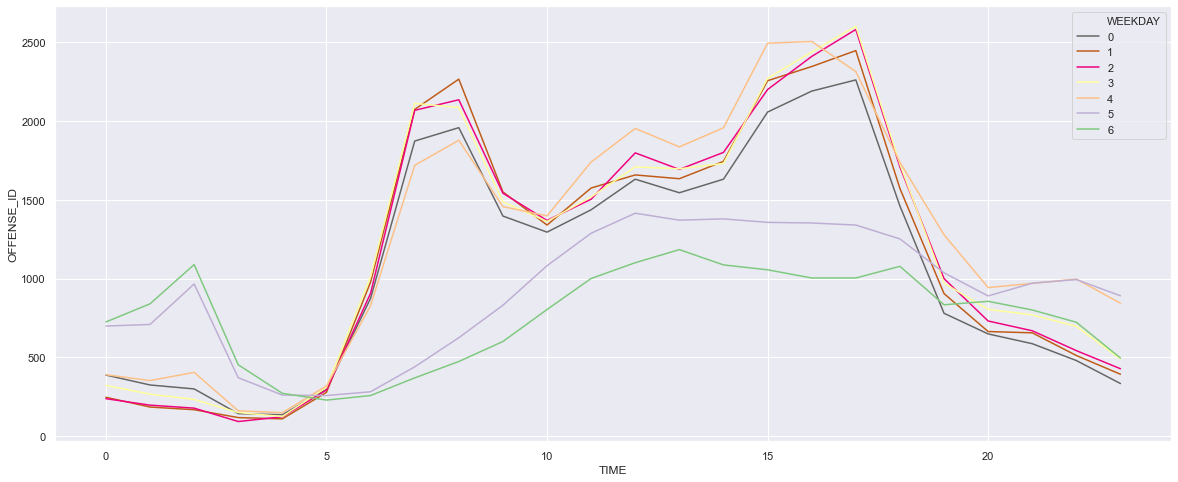

In [987]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.lineplot(x="TIME", y="OFFENSE_ID",
                  hue="WEEKDAY", 
                  legend='full',
                  palette='Accent_r',
                  #markers=False, 
                  #style='YEAR', 
                  dashes=False, data=dchart1)

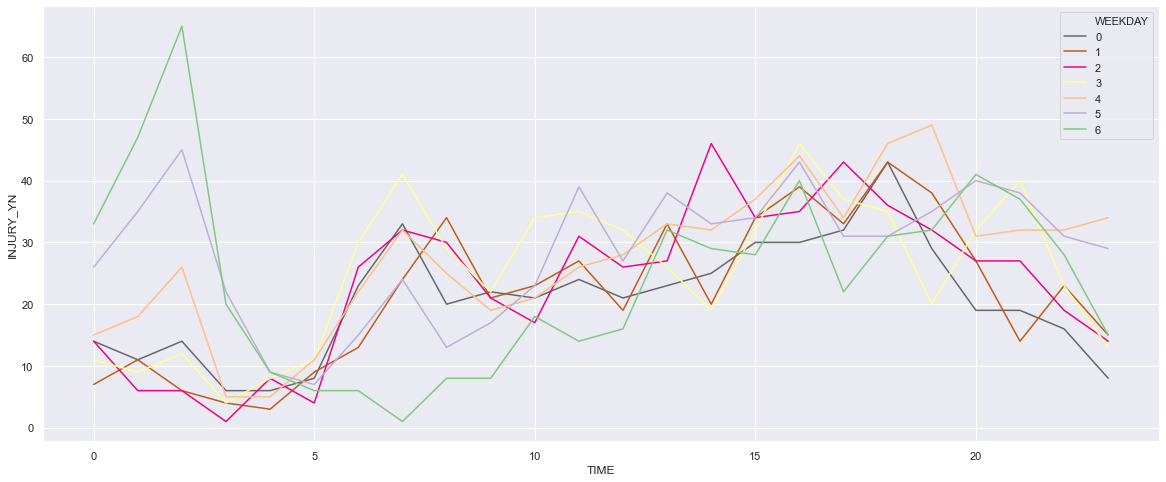

In [988]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.lineplot(x="TIME", y="INJURY_YN",
                  hue="WEEKDAY", 
                  legend='full',
                  palette='Accent_r',
                  #markers=False, 
                  #style='YEAR', 
                  dashes=False, data=dchart1)

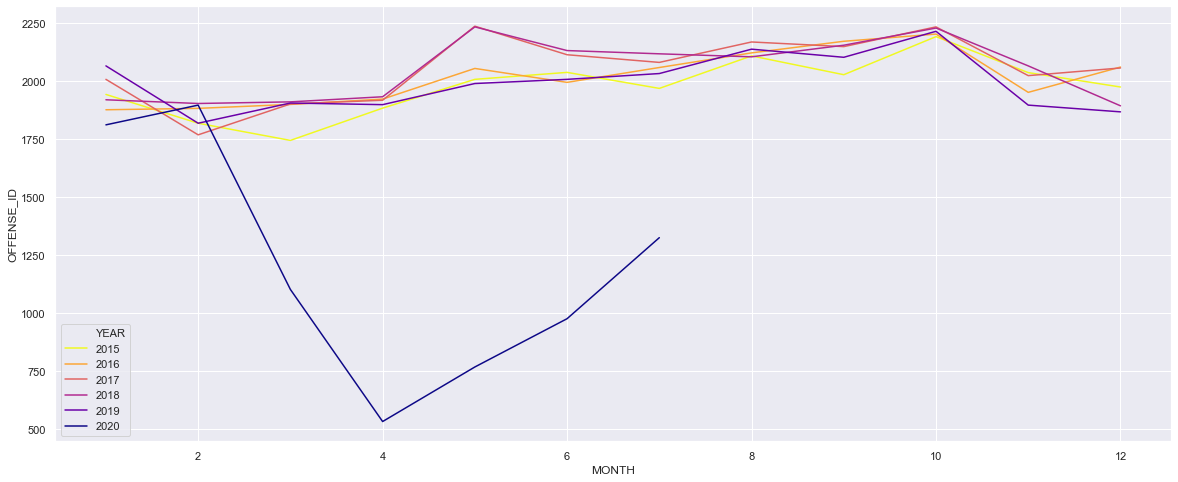

In [1193]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.lineplot(x="MONTH", y="OFFENSE_ID",
                  hue="YEAR", 
                  legend='full',
                  palette='plasma_r',
                  #markers=False, 
                  #style='YEAR', 
                  dashes=False, data=dchart)

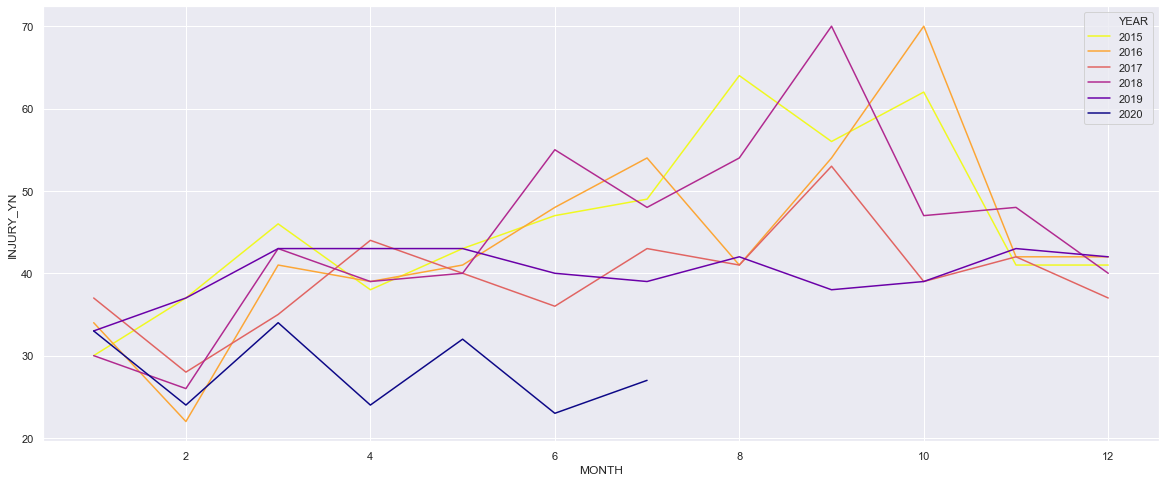

In [1195]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.lineplot(x="MONTH", y="INJURY_YN",
                  hue="YEAR", 
                  legend='full',
                  palette='plasma_r',
                  #markers=False, 
                  #style='YEAR', 
                  dashes=False, data=dchart)

In [828]:
not_other = df.loc[(df['HUMAN_FACTOR'] != "OTHER")]

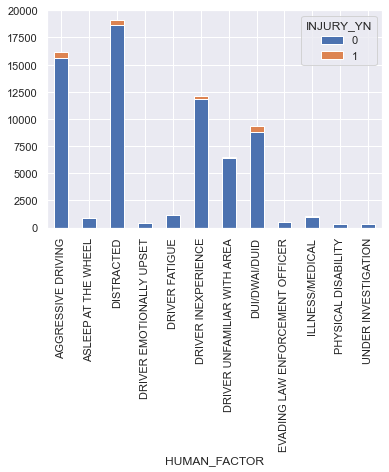

In [850]:
c =not_other.groupby(['HUMAN_FACTOR', 'INJURY_YN'])['HUMAN_FACTOR'].count().unstack('INJURY_YN')
c = c[[0,1]].plot(kind='bar', stacked=True)

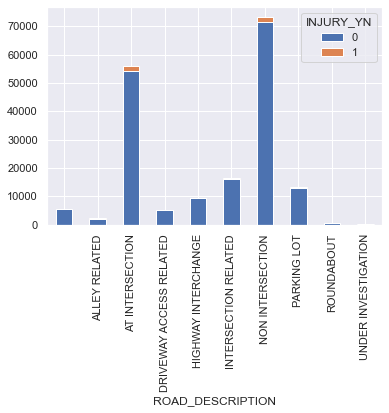

In [1132]:
c = df.groupby(['ROAD_DESCRIPTION', 'INJURY_YN'])['ROAD_DESCRIPTION'].count().unstack('INJURY_YN')
c = c[[0,1]].plot(kind='bar', stacked=True)

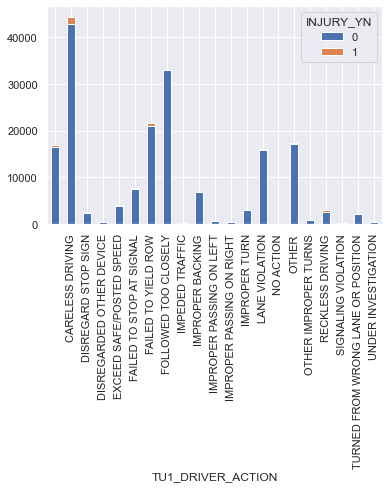

In [1135]:
c = df.groupby(['TU1_DRIVER_ACTION', 'INJURY_YN'])['TU1_DRIVER_ACTION'].count().unstack('INJURY_YN')
c = c[[0,1]].plot(kind='bar', stacked=True)

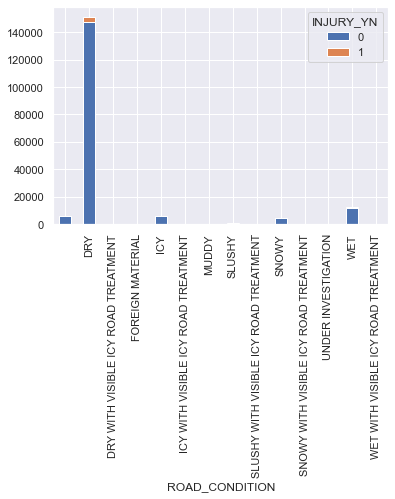

In [856]:
c = df.groupby(['ROAD_CONDITION', 'INJURY_YN'])['ROAD_CONDITION'].count().unstack('INJURY_YN')
c = c[[0,1]].plot(kind='bar', stacked=True)

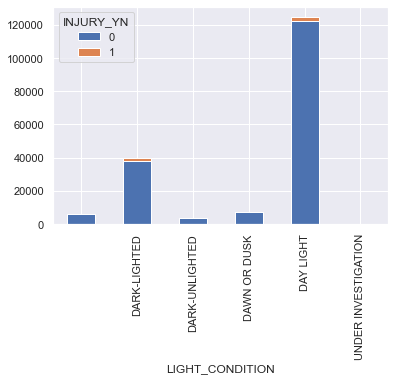

In [857]:
c = df.groupby(['LIGHT_CONDITION', 'INJURY_YN'])['LIGHT_CONDITION'].count().unstack('INJURY_YN')
c = c[[0,1]].plot(kind='bar', stacked=True)

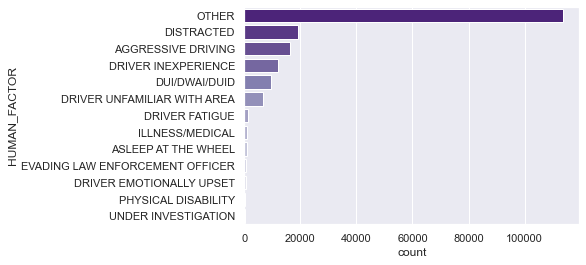

In [862]:
ax = sns.countplot(y='HUMAN_FACTOR', data=df, palette='Purples_r',
                   order = df['HUMAN_FACTOR'].value_counts().index)

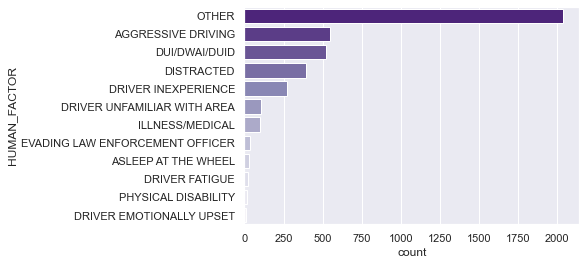

In [861]:
ax = sns.countplot(y='HUMAN_FACTOR', data=injured, palette='Purples_r',
                   order = injured['HUMAN_FACTOR'].value_counts().index)

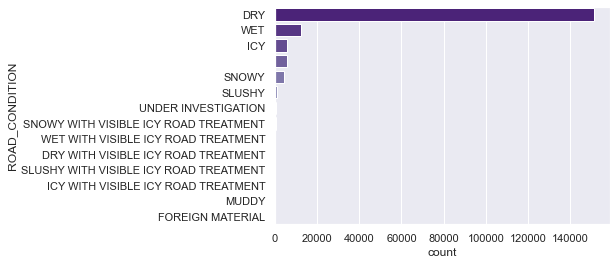

In [863]:
ax1 = sns.countplot(y='ROAD_CONDITION', data=df, palette='Purples_r',
                   order = df['ROAD_CONDITION'].value_counts().index)

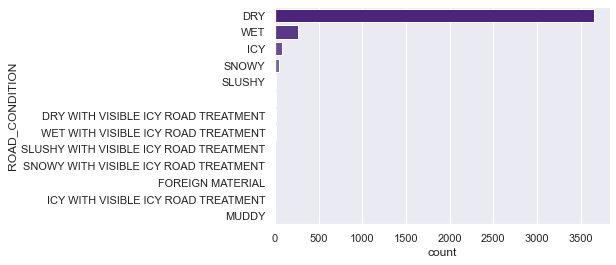

In [859]:
ax1 = sns.countplot(y='ROAD_CONDITION', data=injured, palette='Purples_r',
                   order = injured['ROAD_CONDITION'].value_counts().index)

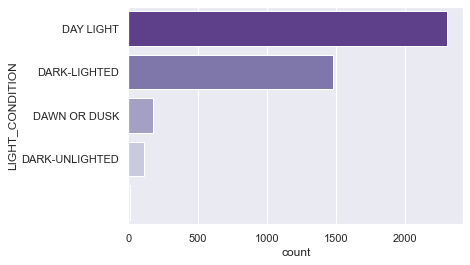

In [858]:
ax1 = sns.countplot(y='LIGHT_CONDITION', data=injured, palette='Purples_r',
                   order = injured['LIGHT_CONDITION'].value_counts().index)

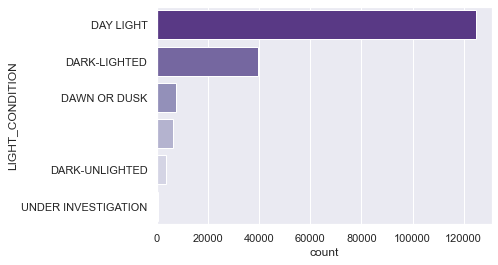

In [864]:
ax1 = sns.countplot(y='LIGHT_CONDITION', data=df, palette='Purples_r',
                   order = df['LIGHT_CONDITION'].value_counts().index)

In [838]:
#subset of incidents with seriously injured or fatal 
injured = df[(df['SERIOUSLY_INJURED']>0) | (df1['FATALITIES']>0)]
injured.shape

(4095, 50)

In [839]:
injured['HUMAN_FACTOR'].value_counts()

OTHER                              2040
AGGRESSIVE DRIVING                  549
DUI/DWAI/DUID                       524
DISTRACTED                          393
DRIVER INEXPERIENCE                 273
DRIVER UNFAMILIAR WITH AREA         104
ILLNESS/MEDICAL                      97
EVADING LAW ENFORCEMENT OFFICER      37
ASLEEP AT THE WHEEL                  31
DRIVER FATIGUE                       25
PHYSICAL DISABILITY                  14
DRIVER EMOTIONALLY UPSET              8
Name: HUMAN_FACTOR, dtype: int64

In [216]:
color_dict = dict({'OTHER':'#4878d0,
                  'AGGRESSIVE DRIVING':'#4878d0',
                  'DUI/DWAI/DUID': 'orange',
                  'DISTRACTED': 'red',
                  'DRIVER INEXPERIENCE': 'dodgerblue',
                  'DRIVER UNFAMILIAR WITH AREA': 'dodgerblue',
                  'ILLNESS/MEDICAL': 'dodgerblue',
                  'EVADING LAW ENFORCEMENT OFFICER': 'dodgerblue',
                  'ASLEEP AT THE WHEEL': 'dodgerblue',
                  'DRIVER FATIGUE': 'dodgerblue',
                  'PHYSICAL DISABILITY': 'dodgerblue',
                  'DRIVER EMOTIONALLY UPSET': 'dodgerblue',   
                  })

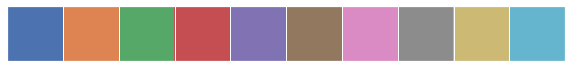

In [277]:
sns.palplot(sns.color_palette("deep"))

In [235]:
i = 0
for k,v in color_dict.items():
    color_dict[k] = l[i]
    i += 1
color_dict

{'OTHER': '#4878d0',
 'AGGRESSIVE DRIVING': '#ee854a',
 'DUI/DWAI/DUID': '#6acc64',
 'DISTRACTED': '#d65f5f',
 'DRIVER INEXPERIENCE': '#956cb4',
 'DRIVER UNFAMILIAR WITH AREA': '#8c613c',
 'ILLNESS/MEDICAL': '#dc7ec0',
 'EVADING LAW ENFORCEMENT OFFICER': '#797979',
 'ASLEEP AT THE WHEEL': '#d5bb67',
 'DRIVER FATIGUE': '#82c6e2',
 'PHYSICAL DISABILITY': '#4c72b0',
 'DRIVER EMOTIONALLY UPSET': '#dd8452'}

In [232]:
pal = sns.color_palette('muted')
pal.as_hex()

['#4878d0',
 '#ee854a',
 '#6acc64',
 '#d65f5f',
 '#956cb4',
 '#8c613c',
 '#dc7ec0',
 '#797979',
 '#d5bb67',
 '#82c6e2']

In [231]:
#l = []
#for i in pal.as_hex():
#    l.append(i)
l.append('#dd8452')
l

['#4878d0',
 '#ee854a',
 '#6acc64',
 '#d65f5f',
 '#956cb4',
 '#8c613c',
 '#dc7ec0',
 '#797979',
 '#d5bb67',
 '#82c6e2',
 '#4c72b0',
 '#dd8452',
 '#dd8452']

In [841]:
injured.shape

(4095, 50)

In [363]:
li = df.groupby(['LIGHT_CONDITION'])['LIGHT_CONDITION'].count().fillna(0)

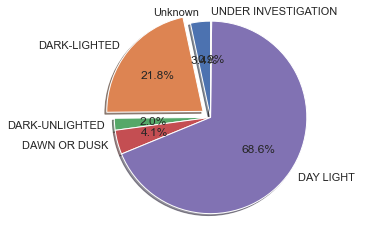

In [365]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Unknown', 'DARK-LIGHTED', 'DARK-UNLIGHTED', 'DAWN OR DUSK', 'DAY LIGHT', 'UNDER INVESTIGATION'
sizes = li
explode = (0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [361]:
#example stacked barchart
#si = df.groupby(['ROAD_CONDITION', 'LIGHT_CONDITION'])['ROAD_CONDITION'].count().unstack('LIGHT_CONDITION').fillna(0)
#si[['DAY LIGHT','DARK-LIGHTED']].plot(kind='bar', stacked=True)

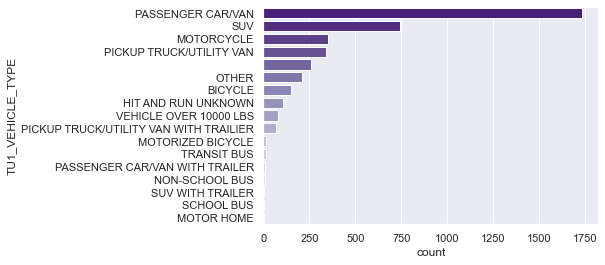

In [843]:
ax1 = sns.countplot(y='TU1_VEHICLE_TYPE', data=si, palette='Purples_r',
                   order = injured['TU1_VEHICLE_TYPE'].value_counts().index)

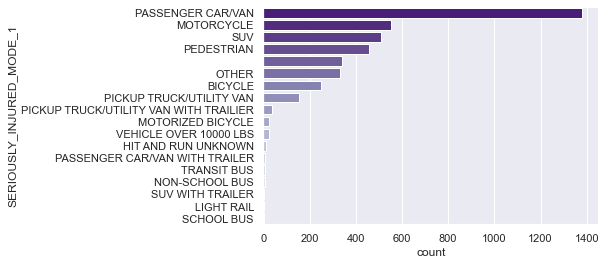

In [844]:
ax1 = sns.countplot(y='SERIOUSLY_INJURED_MODE_1', data=si, palette='Purples_r',
                   order = injured['SERIOUSLY_INJURED_MODE_1'].value_counts().index)

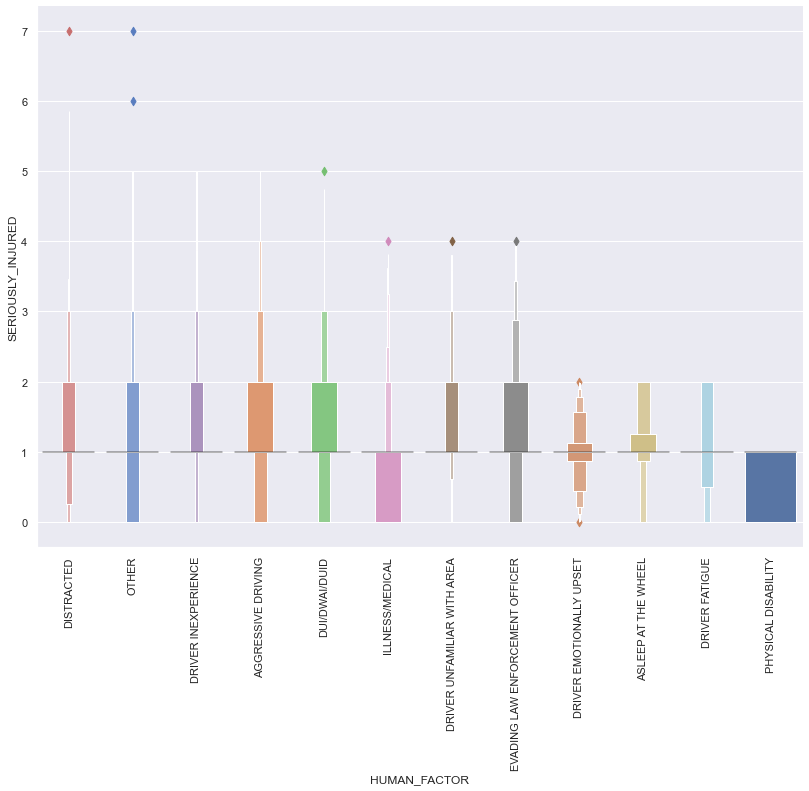

In [845]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sc = sns.catplot(x="HUMAN_FACTOR", y="SERIOUSLY_INJURED", kind="boxen", palette=color_dict,
            data=injured.sort_values("SERIOUSLY_INJURED", ascending=False), height=8.27, aspect=11.7/8.27);
sc.set_xticklabels(rotation=90)

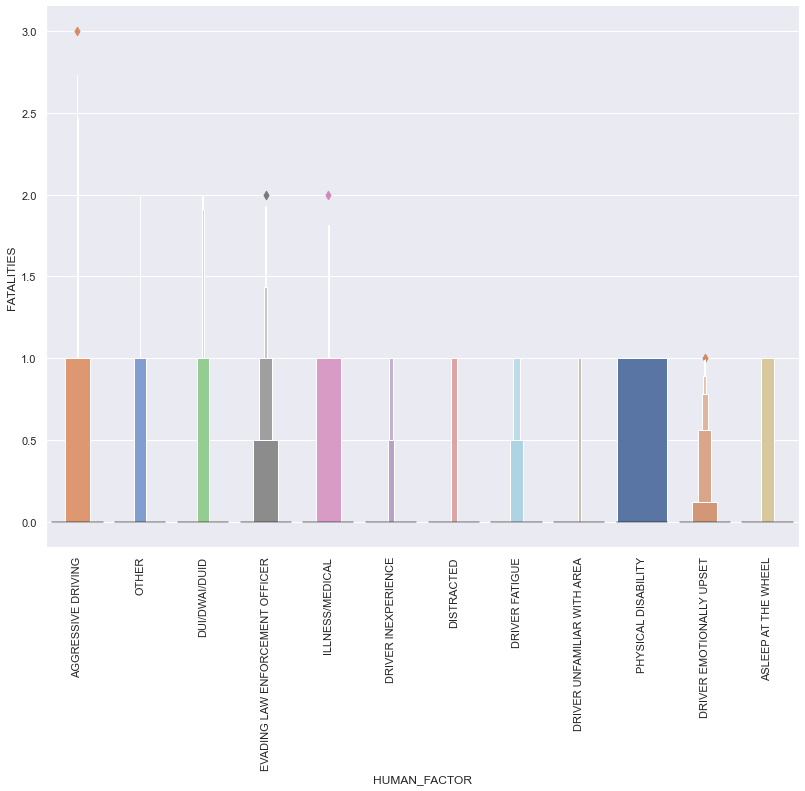

In [846]:
sc = sns.catplot(x="HUMAN_FACTOR", y="FATALITIES", kind="boxen", palette=color_dict,
            data=injured.sort_values("FATALITIES", ascending=False), height=8.27, aspect=11.7/8.27);
sc.set_xticklabels(rotation=90)